In [254]:
import os,sys
import numpy as np

In [312]:
# Data FOLDER : contains 800 files per folder for training the data
# SmallDataTrain FOLDER : contains 200 files per folder for testing the data

# defining few variables
files_in_folder_train=800
files_in_folder_test=200

no_of_folders=20

In [256]:
# get the current working directory
os.getcwd()

'C:\\Users\\Garima\\Desktop\\CN\\20th topic Text Classification'

In [257]:
# stopwords that shouldn't be used in the vocabulory
stopWordsDict={'I': 0,'me': 0,'my': 0,'myself': 0,'we': 0,'our': 0,'ours': 0,'ourselves': 0,'you': 0,'your': 0,'yours': 0,
               'ourself': 0,'yourselves': 0,'he': 0,'him': 0,'his': 0,'himself': 0,'she': 0,'her': 0,'hers': 0,'herself': 0,
               'it': 0,'its': 0,'itself': 0,'they': 0,'them': 0,'their': 0,'theirs': 0,'themselves': 0,'what': 0,'which': 0,
               'who': 0,'whom': 0,'this': 0,'that': 0,'these': 0,'those': 0,'am': 0,'is': 0,'are': 0,'was': 0,'were': 0,'be': 0,
               'been': 0,'being': 0,'have': 0,'has': 0,'had': 0,'having': 0,'do': 0,'does': 0,'did': 0,'doing': 0,'a': 0,'an': 0,
               'the': 0,'and': 0,'but': 0,'if': 0,'or': 0,'because': 0,'as': 0,'until': 0,'while': 0,'of': 0,'at': 0,'by': 0,
               'for': 0,'with': 0,'about': 0,'against': 0,'between': 0,'into': 0,'through': 0,'during': 0,'before': 0,'after': 0,
               'above': 0,'below': 0,'to': 0,'from': 0,'up': 0,'down': 0,'in': 0,'out': 0,'on': 0,'off': 0,'over': 0,'under': 0,
               'again': 0,'further': 0,'then': 0,'once': 0,'here': 0,'there': 0,'when': 0,'where': 0,'why': 0,'how': 0,'all': 0,
               'any': 0,'both': 0,'each': 0,'few': 0,'more': 0,'most': 0,'other': 0,'some': 0,'such': 0,'no': 0,'nor': 0,
               'not': 0,'only': 0,'own': 0,'same': 0,'so': 0,'than': 0,'too': 0,'very': 0,'s': 0,'t': 0,'can': 0,'will': 0,
               'just': 0,'don': 0,'should': 0,'now': 0}

In [313]:
# TAKING INPUT OF DATA AND BUILDING VOCABULORY
path='C:\\Users\\Garima\\Desktop\\CN\\20th topic Text Classification\\Data\\newsgroups'

# y_classes has all the folder names
y_classes=[]
for folder in os.listdir(path):
    y_classes.append(folder)

path=path+"\\"
# dict is for constructing the vocabulory for all the words except the stopwords
dict={}

# runs over ALL THE FOLDERS
for i in range(len(y_classes)):
    new_path=path+y_classes[i]
    # for a EVERY FOLDER, runs over ALL THE FILES
    for file in os.listdir(new_path):
        file_path=new_path+"\\"+file
        # opens EACH FILE and reads word by word
        f=open(file_path,'r')
        for line in f:
            for word in line.split():
                # check whether it is a stopword or not 
                #  ->(YES, ignore)
                #  ->(NO, check whether already in dictionary(increase frequency by 1) or not(set frequency as 1))
                if not(word in stopWordsDict):
                    if word in dict:
                        dict[word]+=1
                    else:
                        dict[word]=1

In [314]:
# Sorting the dictionary in order to find top K words
list=[(dict[w],w) for w in dict]
list.sort(reverse=True)
print(len(list))
list[0][0]

403589


38928

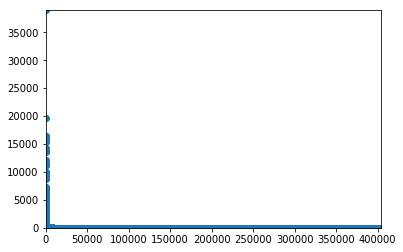

In [315]:
# graph to determine the top K elements
import matplotlib.pyplot as plt
x1=np.arange(0,len(list))
x2=[]
for i in range(0,len(list)):
    x2.append(list[i][0])
plt.scatter(x1,x2)
plt.axis([0,len(list),0,list[0][0]])
plt.show()

In [316]:
# omitting words with frequency less than 12 and constructing featureSet dictionary
featureSet={}
i=0
while list[i][0] > 12:
    featureSet[list[i][1]]=i
    i=i+1
len(featureSet.keys())

25445

In [317]:
# BUILDING y_train
path='C:\\Users\\Garima\\Desktop\\CN\\20th topic Text Classification\\Data\\newsgroups'

y_train=[]
# over all the folders and number of files within it
for folder in os.listdir(path):
    for i in range(files_in_folder_train):
        y_train.append(folder)
        
y_train_new=np.array(y_train)
print(y_train_new.shape)

(16000,)


In [318]:
# BUILDING x_train
path='C:\\Users\\Garima\\Desktop\\CN\\20th topic Text Classification\\Data\\newsgroups'

# y_classes has all the folder names
y_classes=[]
for folder in os.listdir(path):
    y_classes.append(folder)

path=path+"\\"

# Initialising x_train with frequency for all features to be 0
x_train=[[0 for j in range(len(featureSet.keys()))] for i in range(no_of_folders*files_in_folder_train)]

file_no=0
# loops over ALL THE FOLDER
for i in range(len(y_classes)):
    new_path=path+y_classes[i]
    
    # loops over EACH FOLDER, for ALL FILES
    for file in os.listdir(new_path):
        
        # open EACH FILE and read WORD BY WORD
        file_path=new_path+"\\"+file
        f=open(file_path,'r')
        
        for line in f:
            for word in line.split():
                # if word is in vocabulory then increase frequency, else ignore
                if word in featureSet:
                    x_train[file_no][featureSet[word]]+=1
        file_no+=1
        
x_train_new=np.array([np.array(xi) for xi in x_train])
x_train_new.shape

(16000, 25445)

In [319]:
# Building y_test
path='C:\\Users\\Garima\\Desktop\\CN\\20th topic Text Classification\\SmallDataTrain\\newsgroups'

y_test=[]
# over all the folders and number of files within it
for folder in os.listdir(path):
    for i in range(files_in_folder_test):
        y_test.append(folder)
        
y_test_new=np.array(y_test)
print(y_test_new.shape)

(4000,)


In [320]:
# BUILDING x_test
path='C:\\Users\\Garima\\Desktop\\CN\\20th topic Text Classification\\SmallDataTrain\\newsgroups'

# y_classes has all the folder names
y_classes=[]
for folder in os.listdir(path):
    y_classes.append(folder)

path=path+"\\"

# Initialising x_test with frequency for all features to be 0
x_test=[[0 for j in range(len(featureSet.keys()))] for i in range(no_of_folders * files_in_folder_test)]

file_no=0
# loops over ALL THE FOLDER
for i in range(len(y_classes)):
    new_path=path+y_classes[i]
    
    # loops over EACH FOLDER, for ALL FILES
    for file in os.listdir(new_path):
        
        # open EACH FILE and read WORD BY WORD
        file_path=new_path+"\\"+file
        f=open(file_path,'r')
        
        for line in f:
            for word in line.split():
                # if word is in vocabulory then increase frequency, else ignore
                if word in featureSet:
                    x_test[file_no][featureSet[word]]+=1
        file_no+=1
        
x_test_new=np.array([np.array(xi) for xi in x_test])
print(x_test_new.shape)

(4000, 25445)


In [321]:
# 1st WAY: USING MULTINOMIAL NAIVE BAYES IN SKLEARN

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

clf=MultinomialNB()
clf.fit(x_train_new,y_train_new)
y_pred_Multi=clf.predict(x_test_new)

In [322]:
clf.score(x_test_new,y_test_new)

0.844

In [271]:
# check performance of the Naive Bayes

print(classification_report(y_test_new,y_pred_Multi))
print(confusion_matrix(y_test_new,y_pred_Multi))

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.86      0.85       200
           comp.graphics       0.90      0.92      0.91       200
 comp.os.ms-windows.misc       0.91      0.96      0.93       200
comp.sys.ibm.pc.hardware       0.94      0.98      0.96       200
   comp.sys.mac.hardware       0.97      0.97      0.97       200
          comp.windows.x       0.95      0.91      0.93       200
            misc.forsale       0.90      0.95      0.93       200
               rec.autos       0.98      0.99      0.98       200
         rec.motorcycles       0.99      0.99      0.99       200
      rec.sport.baseball       1.00      0.99      0.99       200
        rec.sport.hockey       0.98      0.98      0.98       200
               sci.crypt       1.00      0.95      0.97       200
         sci.electronics       0.94      0.99      0.97       200
                 sci.med       0.99      0.94      0.97       200
         

In [329]:
# 2nd WAY: SELF-IMPLEMENTED MULTINOMIAL NAIVE BAYES

dictionary=fit(x_train_new,y_train_new)
print(dictionary.keys())
dictionary

dict_keys(['total_y', 'rec.sport.hockey', 'talk.politics.mideast', 'talk.politics.guns', 'rec.autos', 'comp.graphics', 'sci.med', 'misc.forsale', 'rec.sport.baseball', 'talk.politics.misc', 'comp.sys.mac.hardware', 'rec.motorcycles', 'soc.religion.christian', 'sci.electronics', 'comp.sys.ibm.pc.hardware', 'comp.windows.x', 'talk.religion.misc', 'comp.os.ms-windows.misc', 'sci.space', 'sci.crypt', 'alt.atheism'])


{'total_y': 16000,
 'rec.sport.hockey': {'total_word_count_in_class': 138813,
  'total_y_in_class': 800,
  1: 1831,
  2: 878,
  3: 825,
  4: 802,
  5: 801,
  6: 802,
  7: 801,
  8: 801,
  9: 800,
  10: 800,
  11: 793,
  12: 673,
  13: 387,
  14: 1123,
  15: 493,
  16: 519,
  17: 615,
  18: 413,
  19: 530,
  20: 550,
  21: 456,
  22: 547,
  23: 402,
  24: 374,
  25: 455,
  26: 321,
  27: 284,
  28: 224,
  29: 167,
  30: 300,
  31: 348,
  32: 423,
  33: 278,
  34: 205,
  35: 243,
  36: 217,
  37: 276,
  38: 173,
  39: 7,
  40: 373,
  41: 35,
  42: 6,
  43: 6,
  44: 221,
  45: 135,
  46: 2402,
  47: 163,
  48: 250,
  49: 256,
  50: 199,
  51: 92,
  52: 150,
  53: 1621,
  54: 104,
  55: 236,
  56: 111,
  57: 138,
  58: 138,
  59: 236,
  60: 2603,
  61: 199,
  62: 114,
  63: 206,
  64: 93,
  65: 134,
  66: 163,
  67: 0,
  68: 79,
  69: 115,
  70: 105,
  71: 168,
  72: 146,
  73: 278,
  74: 125,
  75: 84,
  76: 125,
  77: 38,
  78: 239,
  79: 281,
  80: 37,
  81: 80,
  82: 158,
  83: 64,
  8

In [331]:
# predicting y_pred_class corresponding to x_test_new

y_pred_class=predict(x_test_new,dictionary)

alt.atheism
talk.religion.misc
talk.religion.misc
talk.religion.misc
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
talk.religion.misc
alt.atheism
alt.atheism
talk.religion.misc
alt.atheism
alt.atheism
talk.religion.misc
talk.religion.misc
alt.atheism
talk.religion.misc
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
talk.religion.misc
alt.atheism
alt.atheism
alt.atheism
talk.religion.misc
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
talk.religion.misc
alt.atheism
alt.atheism
talk.religion.misc
talk.religion.misc
talk.religion.misc
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
alt.atheism
talk.religion.misc
talk.religion.misc
sci.med
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
alt.atheism
alt.atheism
alt.atheism
rec.motorcycles
talk.religion.misc
a

comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.graphics
comp.graphics
comp.sys.mac.hardware
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
misc.forsale
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
talk.religion.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.os.

comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.sys.mac.hardware
sci.electronics
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.graphics
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.sys.mac.hardw

misc.forsale
misc.forsale
misc.forsale
misc.forsale
sci.electronics
misc.forsale
misc.forsale
rec.autos
misc.forsale
rec.sport.baseball
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
comp.sys.ibm.pc.hardware
misc.forsale
comp.os.ms-windows.misc
rec.autos
misc.forsale
misc.forsale
sci.space
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
misc.forsale
sci.electronics
misc.forsale
misc.forsale
misc.forsale
comp.os.ms-windows.misc
misc.forsale
comp.sys.ibm.pc.hardware
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
misc.forsale
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.autos
rec.aut

rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.hockey
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.baseball
rec.sport.base

sci.crypt
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
comp.graphics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
comp.graphics
sci.electronics
sci.electronics
comp.graphics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
comp.graphics
sci.electronics
sci.electronics
sci.electronics
comp.sys.mac.hardware
sci.electronics
comp.os.ms-windows.misc
sci.electronics
rec.autos
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
rec.autos
sci.electronics
sci.electronics
misc.forsale
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
comp.graphics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
sci.electronics
comp.os.ms-windows.misc
talk.politics.mis

soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religio

talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.misc
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
rec.autos
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
misc.forsale
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
comp.graphics
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
misc.forsale
talk.politics.mideast
talk.politics.guns
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
talk.politics.misc
talk.politics.mideast
talk.politics.mideast
talk.politics

talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
alt.atheism
talk.religion.misc
alt.atheism
alt.atheism
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.politics.misc
talk.religion.misc
alt.atheism
talk.politics.guns
sci.electronics
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
alt.atheism
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
talk.religion.misc
soc.religion.christian
talk.religion.misc
sci.space
comp.os.ms-windows.misc
talk.religion.misc
talk.religion.misc
talk.politics.mideast
talk.religion.misc
talk.religion.misc
rec.autos
talk.religion.misc
talk.politics.guns
talk.religion.misc
comp.graphics
soc.religion.christian
sci.electronics
talk.religion.misc
alt.atheism
talk.religion.misc
alt.atheism
talk.religion.misc
soc.religion.christian
talk.religion.misc
talk.religion

In [332]:
print(len(y_pred_class))

4000


In [333]:
print(classification_report(y_test_new,y_pred_class))
print(confusion_matrix(y_test_new,y_pred_class))

                          precision    recall  f1-score   support

             alt.atheism       0.70      0.78      0.74       200
           comp.graphics       0.71      0.73      0.72       200
 comp.os.ms-windows.misc       0.74      0.81      0.78       200
comp.sys.ibm.pc.hardware       0.84      0.85      0.84       200
   comp.sys.mac.hardware       0.85      0.90      0.87       200
          comp.windows.x       0.91      0.80      0.85       200
            misc.forsale       0.79      0.86      0.83       200
               rec.autos       0.84      0.95      0.89       200
         rec.motorcycles       0.93      0.94      0.93       200
      rec.sport.baseball       0.97      0.96      0.97       200
        rec.sport.hockey       0.97      0.93      0.95       200
               sci.crypt       0.91      0.88      0.89       200
         sci.electronics       0.80      0.84      0.82       200
                 sci.med       0.93      0.81      0.86       200
         

In [335]:
print("score for Self-Implemented MultinomialNB ")
score=((y_test_new == y_pred_class).sum())/len(y_test_new)
print(score)

score for Self-Implemented MultinomialNB 
0.844


In [328]:
def fit(x_train,y_train):
    # initialise a dictionary
    result={}
    class_values=set(y_train)
    
    # count all the documents
    result["total_y"]=y_train.shape[0]
    
    # loops over EACH CLASS
    for current_class in class_values:
        result[current_class]={}
        
        # dataset selection for a particular class
        criteria=(y_train == current_class)
        x_train_current=x_train[criteria]
        y_train_current=y_train[criteria]
        
        # for EVERY CLASS, storing no. of documents and no. of words 
        result[current_class]["total_word_count_in_class"]=sum(map(sum,x_train_current))
        result[current_class]["total_y_in_class"]=y_train_current.shape[0]
        
        num_features=x_train.shape[-1]
        
        # storing frequency for EVERY FEATURE in EVERY CLASS by summing
        for i in range(1,num_features+1):
            result[current_class][i]=sum(x_train_current[:,i-1])
            
    return result

In [325]:
def predict(x_test,dictionary):
    y_pred=[]
    
    # loops over all the x_test and selecting every datapoint to determine y_class
    for x in x_test:
        y_class=predictSinglePoint(x,dictionary)
        y_pred.append(y_class)
        print(y_class)
    return y_pred

In [324]:
def predictSinglePoint(x,dictionary):
    best_class=-1000
    best_p=1000
    first_run=True
    
    # storing all the classes in class_values
    class_values=dictionary.keys()
    
    # loops over ALL THE CLASSES
    for current_class in class_values:
        if current_class=="total_y":
            continue
            
        # calculate probability corresponding to every class
        current_class_p=probabilityL(x,dictionary,current_class)
        
        # calculating best probability and class
        if first_run or best_p < current_class_p:
            best_p=current_class_p
            best_class=current_class
        first_run=False
    return best_class

In [323]:
def probabilityL(x,dictionary,current_class):
    # calculating P(y = current_class)
    output=np.log(dictionary[current_class]["total_y_in_class"]) - np.log(dictionary["total_y"])

    num_features=len(dictionary[current_class].keys()) - 2
    
    # calculating P(X=x/y=current_class) = P(w1/y=current_class)*P(w2/y=current_class)....*P(wn/y=current_class)
    for i in range(1,num_features + 1):
        count_current_class_with_feature_word=dictionary[current_class][i] + 1
        count_current_class_with_all_feature_words=dictionary[current_class]["total_word_count_in_class"]+num_features
        
        probability_of_feature_word=np.log(count_current_class_with_feature_word) - np.log(count_current_class_with_all_feature_words)
        
        # if a word appears multiple time, adding probabilities for it
        x_copy=x.copy()
        while x_copy[i-1]>0:
            output+=probability_of_feature_word
            x_copy[i-1]-=1
            
    return output